In [1]:
import tweepy
import pandas as pd
import numpy as np
import json
import requests
import os
import io
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
df_twitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = url.split('/')[-1]
with open(os.path.join(file_name),'wb') as file:
    file.write(response.content)

In [4]:
df_predic = pd.read_csv(file_name, sep='\t')

In [8]:
df_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
df_predic.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
df_predic.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [11]:
consumer_key = 'YOv6z2wM7UwCIJ7wN26HVY53l'
consumer_secret = 'dCpviIQWsmriJmNiYfGpkOdt6AUL9xXznHHYwxXSl4DNFI9mds'
access_token = '2591060876-UKgAktC1bMuc3lz4NzKyRq2a725QuCboin3hTYW'
access_secret = 'K2NveiKEgUCLMcC6WJh0iIsX1dZSrr5hLmdLOj2hn1ugt'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
api.wait_on_rate_limit = True
api.wait_on_rate_limit_notify = True


In [12]:
start = time.time()
print("start load json file")

with io.open('tweet_json.txt','w',encoding='utf8') as file:
    file.write('')

line_count = 0
failed_count = 0

for i in df_twitter.index:
    try:
        json_text = api.get_status(df_twitter.tweet_id[i],tweet_mode='extended')
        with io.open('tweet_json.txt', 'a', encoding='utf8') as json_file:
            json.dump((json_text._json), json_file)
            line_count += 1
            json_file.write('\n')
    except:
        print('tweet id ' + str(df_twitter.tweet_id[i]) + ' not found')
        failed_count += 1

end = time.time()
print('finished load json file, spending ' + str(end - start) + ' seconds')
print('load successed '+ str(line_count) + ' lines twitter record')
print('faild load '+ str(failed_count))


start load json file
tweet id 888202515573088257 not found
tweet id 873697596434513921 not found
tweet id 872668790621863937 not found
tweet id 869988702071779329 not found
tweet id 866816280283807744 not found
tweet id 861769973181624320 not found
tweet id 845459076796616705 not found
tweet id 842892208864923648 not found
tweet id 837012587749474308 not found
tweet id 827228250799742977 not found
tweet id 812747805718642688 not found
tweet id 802247111496568832 not found
tweet id 775096608509886464 not found
tweet id 770743923962707968 not found


Rate limit reached. Sleeping for: 727


tweet id 754011816964026368 not found
tweet id 680055455951884288 not found


Rate limit reached. Sleeping for: 725


finished load json file, spending 1927.3523688316345 seconds
load successed 2340 lines twitter record
faild load 16


In [35]:
list_temp = []

with open('tweet_json.txt','r',encoding='utf8') as file:
    for _ in range(line_count):
        text = json.loads(file.readline())
        tweet_id = text['id']
        retweet_count = text['retweet_count']
        favorite_count = text['favorite_count']
        user_followers = text['user']['followers_count']
        try:
            media_type = text['extended_entities']['media'][0]['type']
        except:
            media_type = 'no media'
        
        dict_temp = {'tweet_id':tweet_id,\
                     'retweet_count':retweet_count,\
                     'favorite_count':favorite_count,\
                     'user_followers':user_followers,\
                    'media_type':media_type}
        list_temp.append(dict_temp)


In [36]:
df_json = pd.DataFrame(list_temp, columns = ['tweet_id','media_type','retweet_count','favorite_count','user_followers'])

In [37]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 5 columns):
tweet_id          2340 non-null int64
media_type        2340 non-null object
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
user_followers    2340 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.5+ KB


In [38]:
df_json.to_csv('df_json.csv')

In [101]:
df_json = pd.read_csv('df_json.csv',index_col=0)

In [102]:
df_twitter_clean = df_twitter.copy()

In [103]:
df_predic_clean = df_predic.copy()

In [104]:
df_json_clean = df_json.copy()

# Assess

#### Quality issue:
###### - df_twitter
###### 1. retweet recored rows need  to be droped. because retweet dosn't have photo or video.
###### 2. source column content included html, should be categorical variable, it can be extract from the strings
###### 3. timestamp, variable should be datetime, no strings
###### 4. in_reply_to_status_id, in_reply_to_user_id, should be int type.
###### 5. rating_denominator column the value should be 10, but there are 18 different value. serching rate mistake manualy: rate mistake: 
######     835246439529840640 rate 960/0 is not valid rating, 
######     other issue will be solved one by one: 666287406224695296, 810984652412424192, 716439118184652801, 
######     740373189193256964 , 682962037429899265, 722974582966214656, after that I will use scatterplot to check abnormal value.
###### 6. Some rate included decimal, 11.26,11.27,9.75, but numerator were extracted wrong to 26,27,75
###### 7. dog name and stage missing value, also if we don't know the name or stage, the variable should be NaN, not string 'null'
## ------------------------------------------------------------------------------------------------------------------------------ 

#### Tidiness issue:
###### 1. dog stage should be in one categorical column.
###### 2. df_twitter should merge df_json and df_predic to add tweet's featurs
## ------------------------------------------------------------------------------------------------------------------------------ 

# Clean
## Quality issue:

#### 1. retweet recored rows need to be droped. because retweet dosn't have photo or video.
###### Define:
###### A.to select the index of retweeter, and use pandas drop function drop them by row
###### B.to drop the columns which are recorded retweeter information, because they are empty.

###### Code:

In [105]:
retweeter_idx = df_twitter_clean[df_twitter_clean['retweeted_status_id'].notna()].index

In [106]:
df_twitter_clean.drop(retweeter_idx, axis=0, inplace=True)

In [107]:
df_twitter_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)
df_twitter_clean.reset_index(drop=True,inplace=True)

In [108]:
df_twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [109]:
df_twitter_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2170,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2171,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2172,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2173,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2174,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


###### Test:

In [110]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 238.0+ KB


###### 2. source column content included html, should be categorical variable, it can be extract from the strings
###### Define:
###### A. Use BeautifulSoup extract 'source' column value, there four type source. 
###### B. Create a new column 'source_type' as categorical variable.

In [111]:
df_twitter_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

###### Code:

In [112]:
def source_to_categorical(txt):
    soup = BeautifulSoup(txt,'lxml')
    result = soup.find('a').contents[0]
    if result == 'Twitter for iPhone':
        return 'iPhone'
    elif result == 'Vine - Make a Scene':
        return 'Vine'
    elif result == 'Twitter Web Client':
        return 'WebClient'
    elif result == 'TweetDeck':
        return 'TweetDeck'

In [113]:
df_twitter_clean['source_type'] = df_twitter_clean['source'].apply(lambda value: source_to_categorical(value))

In [114]:
df_twitter_clean['source_type'] = df_twitter_clean.source_type.astype(dtype='category')

In [115]:
df_twitter_clean.drop(['source'],axis=1,inplace=True)

In [116]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
source_type              2175 non-null category
dtypes: category(1), float64(2), int64(3), object(8)
memory usage: 223.3+ KB


###### Test:

In [117]:
df_twitter_clean.source_type.value_counts()

iPhone       2042
Vine           91
WebClient      31
TweetDeck      11
Name: source_type, dtype: int64

###### 3. timestamp, variable should be datetime, no strings
###### Define:
###### Use pd.to_datetime change column type to datetime
###### Code:

In [118]:
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])

###### Test:

In [119]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
source_type              2175 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 223.3+ KB


###### 4. in_reply_to_status_id, in_reply_to_user_id, should be int type.
###### Define:
###### Use astype to change the columns type
###### Code:

In [120]:
df_twitter_clean['in_reply_to_status_id'] = df_twitter_clean['in_reply_to_status_id'].fillna(0).astype(dtype = 'int64')
df_twitter_clean['in_reply_to_user_id'] = df_twitter_clean['in_reply_to_user_id'].fillna(0).astype(dtype = 'int64')

###### Test:

In [121]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null int64
in_reply_to_user_id      2175 non-null int64
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
source_type              2175 non-null category
dtypes: category(1), datetime64[ns](1), int64(5), object(7)
memory usage: 223.3+ KB


###### 5. rate mistake: 666287406224695296, 810984652412424192, 716439118184652801,  740373189193256964 , 
######     682962037429899265, 722974582966214656, 835246439529840640, 832088576586297345
######     Define: check text and rating, find the issue
######     Code:

In [122]:
pd.options.display.max_colwidth = 200

In [123]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 666287406224695296,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
2154,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


###### To check the text, the correct rate is 9/10, 3 1/2 is a description of leg.

In [124]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 666287406224695296,['rating_numerator','rating_denominator']] = [9,10]

######  Test

In [125]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 666287406224695296,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
2154,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10


=====================================================================================================

In [126]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 716439118184652801,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
1024,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


###### To check the text, the correct rate is 11/10

In [127]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 716439118184652801,['rating_numerator','rating_denominator']] = [11,10]

######  Test:

In [128]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 716439118184652801,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
1024,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10


==========================================================================================================

In [129]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 740373189193256964,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
890,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11


###### To check the text, 9/11 is emergency phone number, the correct rate is 14/10

In [130]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 740373189193256964,['rating_numerator','rating_denominator']] = [14,10]

###### Test

In [131]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 740373189193256964,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
890,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10


============================================================================================================

In [132]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 682962037429899265,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
1483,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11


###### To check the text, 7/11 is a store name, the correct rate is 10/10

In [133]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 682962037429899265,['rating_numerator','rating_denominator']] = [10,10]

###### Test:

In [134]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 682962037429899265,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
1483,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10,10


====================================================================================================================

In [135]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 722974582966214656,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
987,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20


######  To check the text , the 4/20 is a date. the correct rate is 13/10

In [136]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 722974582966214656,['rating_numerator','rating_denominator']] = [13,10]

###### Test

In [137]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 722974582966214656,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
987,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10


==============================================================================================================

In [138]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 835246439529840640,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
263,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0


###### To check the text, the 13/10 is a correct rate.

In [139]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 835246439529840640,['rating_numerator','rating_denominator']] = [13,10]

###### Test:

In [140]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 835246439529840640,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
263,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13,10


=============================================================================================================

In [141]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 832088576586297345,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
287,@docmisterio account started on 11/15/15,11,15


In [142]:
df_twitter_clean.drop(df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 832088576586297345].index,inplace=True)

In [143]:
df_twitter_clean.loc[df_twitter_clean['tweet_id'] == 832088576586297345]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_type


===================================================================================================================

###### 6. Some rate included decimal, 11.26,11.27,9.75, but numerator were extracted wrong to 26,27,75
######  Define: To change the value
######  Code:

In [144]:
df_twitter_clean.loc[df_twitter_clean['rating_numerator']==26 ,'rating_numerator']  = 11.26

In [145]:
df_twitter_clean.loc[df_twitter_clean['rating_numerator']==27 ,'rating_numerator']  = 11.27

In [146]:
df_twitter_clean.loc[df_twitter_clean['rating_numerator']==75 ,'rating_numerator'] = 9.75

###### test

In [147]:
df_twitter_clean.rating_numerator.value_counts()

12.00      500
10.00      443
11.00      426
13.00      309
9.00       156
8.00        98
7.00        53
14.00       44
5.00        36
6.00        32
3.00        19
4.00        16
2.00         9
1.00         7
0.00         2
420.00       2
17.00        1
15.00        1
84.00        1
24.00        1
143.00       1
80.00        1
666.00       1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
9.75         1
99.00        1
121.00       1
11.27        1
11.26        1
88.00        1
144.00       1
20.00        1
44.00        1
60.00        1
Name: rating_numerator, dtype: int64

#### Isuue 5,6 rating mistake, checking, use scatter plot find outlier, and check the tweet's text, however the numerator or denominator  are Abnormally large, if it is from text parsed correctly, it is not outlier. Finaly I creat a new column 'rate', which is caculate by rating_numerator and rating_denominator.

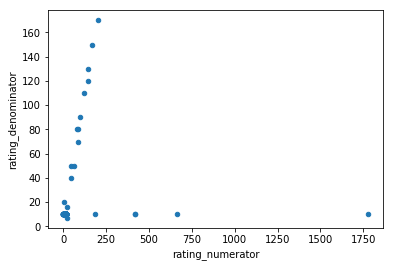

In [148]:
df_twitter_clean.plot(kind = 'scatter', x = 'rating_numerator', y = 'rating_denominator')

In [149]:
df_twitter_clean.loc[df_twitter_clean['rating_numerator'] >20,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
162,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420.0,10
163,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0,10
246,@markhoppus 182/10,182.0,10
363,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70
429,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7
733,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150
804,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10
942,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170
1050,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
1075,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80


###### To change the rate with decimal

In [150]:
df_twitter_clean['rate'] = df_twitter_clean['rating_numerator']/df_twitter_clean['rating_denominator']

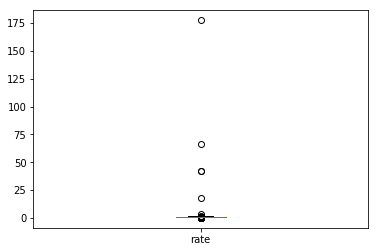

In [151]:
df_twitter_clean['rate'].plot(kind='box')

In [152]:
df_twitter_clean['rate'].describe()

count    2174.000000
mean        1.220426
std         4.245262
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rate, dtype: float64

In [153]:
df_twitter_clean.sort_values('rate',ascending=False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_type,rate
804,749981277374128128,0,0,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,None,None,None,None,TweetDeck,177.600000
163,855860136149123072,855858535607001088,13615722,2017-04-22 19:05:32,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,666.0,10,None,None,None,None,None,iPhone,66.600000
162,855862651834028034,855861584463351808,194351775,2017-04-22 19:15:32,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420.0,10,None,None,None,None,None,iPhone,42.000000
1895,670842764863651840,0,0,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10,None,None,None,None,None,iPhone,42.000000
246,838150277551247360,838145498691194880,21955058,2017-03-04 22:12:52,@markhoppus 182/10,NaN,182.0,10,None,None,None,None,None,iPhone,18.200000
429,810984652412424192,0,0,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7,Sam,None,None,None,None,iPhone,3.428571
52,881633300179243008,881607037314052096,47384430,2017-07-02 21:58:53,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,17.0,10,None,None,None,None,None,iPhone,1.700000
247,838085839343206401,838085539362402304,2894131180,2017-03-04 17:56:49,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN,15.0,10,None,None,None,None,None,iPhone,1.500000
105,870063196459192321,0,0,2017-05-31 23:43:25,Meet Clifford. He's quite large. Also red. Good w kids. Somehow never steps on them. Massive poops very inconvenient. Still 14/10 would ride https://t.co/apVOyDgOju,"https://twitter.com/dog_rates/status/870063196459192321/photo/1,https://twitter.com/dog_rates/status/870063196459192321/photo/1",14.0,10,Clifford,None,None,None,None,iPhone,1.400000
33,885518971528720385,0,0,2017-07-13 15:19:09,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,https://twitter.com/4bonds2carbon/status/885517367337512960,14.0,10,None,None,None,None,None,iPhone,1.400000


In [154]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    2174 non-null int64
in_reply_to_user_id      2174 non-null int64
timestamp                2174 non-null datetime64[ns]
text                     2174 non-null object
expanded_urls            2117 non-null object
rating_numerator         2174 non-null float64
rating_denominator       2174 non-null int64
name                     2174 non-null object
doggo                    2174 non-null object
floofer                  2174 non-null object
pupper                   2174 non-null object
puppo                    2174 non-null object
source_type              2174 non-null category
rate                     2174 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 257.1+ KB


In [155]:
df_twitter_clean.drop(columns=['rating_numerator','rating_denominator'], inplace=True)

###### 7. dog name included "Nona","a","the" invalid strings, they all should be null

In [156]:
df_twitter_clean.name.replace(to_replace='None',value='',inplace=True)

In [157]:
df_twitter_clean.name.replace(to_replace='a',value='',inplace=True)

In [158]:
df_twitter_clean.name.replace(to_replace='the',value='',inplace=True)

In [159]:
df_twitter_clean.name.replace(to_replace='an',value='',inplace=True)

In [160]:
df_twitter_clean.name.replace(to_replace='such',value='',inplace=True)

In [161]:
df_twitter_clean.name.value_counts()

            749
Charlie      11
Lucy         11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Sadie         8
Winston       8
Lola          8
Daisy         7
Toby          7
Bailey        6
Jax           6
Bella         6
Koda          6
Bo            6
Stanley       6
Oscar         6
Bentley       5
Louis         5
Buddy         5
Scout         5
Leo           5
Rusty         5
Milo          5
Chester       5
Dave          5
Phil          4
Boomer        4
           ... 
Mookie        1
Chuck         1
Jeffrie       1
Lipton        1
Kota          1
Rontu         1
Jangle        1
Crawford      1
Spencer       1
Willow        1
Dot           1
Taco          1
Glacier       1
Jaycob        1
Pawnd         1
Jockson       1
Bluebert      1
Kial          1
Fwed          1
Todo          1
Ester         1
Tater         1
Margo         1
Willem        1
Shooter       1
Franq         1
Sky           1
Furzey        1
Henry         1
Ember         1
Name: name, Length: 952,

###### 8. dog stage Null value should be empty string "", and some dog have more than one stage, should be assign only one stage.

In [162]:
df_twitter_clean.doggo.value_counts()

None     2087
doggo      87
Name: doggo, dtype: int64

In [163]:
df_twitter_clean.doggo.replace(to_replace='None',value='',inplace=True)

In [164]:
df_twitter_clean.doggo.value_counts()

         2087
doggo      87
Name: doggo, dtype: int64

In [165]:
df_twitter_clean.floofer.value_counts()

None       2164
floofer      10
Name: floofer, dtype: int64

In [166]:
df_twitter_clean.floofer.replace(to_replace='None',value='',inplace=True)

In [167]:
df_twitter_clean.floofer.value_counts()

           2164
floofer      10
Name: floofer, dtype: int64

In [168]:
df_twitter_clean.pupper.value_counts()

None      1940
pupper     234
Name: pupper, dtype: int64

In [169]:
df_twitter_clean.pupper.replace(to_replace='None',value='',inplace=True)

In [170]:
df_twitter_clean.pupper.value_counts()

          1940
pupper     234
Name: pupper, dtype: int64

In [171]:
df_twitter_clean.puppo.value_counts()

None     2149
puppo      25
Name: puppo, dtype: int64

In [172]:
df_twitter_clean.puppo.replace(to_replace='None',value='',inplace=True)

In [173]:
df_twitter_clean.puppo.value_counts()

         2149
puppo      25
Name: puppo, dtype: int64

In [174]:
empty_stage = 0
morestage = []
for i in df_twitter_clean.index:
    x = 0
    if df_twitter_clean.loc[i,'doggo'] != '':
        x += 1
    if df_twitter_clean.loc[i,'floofer'] != '':
        x += 1
    if df_twitter_clean.loc[i,'pupper'] != '':
        x += 1
    if df_twitter_clean.loc[i,'puppo'] != '':
        x += 1
    if x == 0:
        empty_stage += 1
    if x > 1:
        morestage.append(df_twitter_clean.loc[i,'tweet_id'])
        print(str(df_twitter_clean.loc[i,'tweet_id']) + ' more than one stage')
        
print(str(empty_stage) + ' columns have not dog stage')


855851453814013952 more than one stage
854010172552949760 more than one stage
817777686764523521 more than one stage
808106460588765185 more than one stage
802265048156610565 more than one stage
801115127852503040 more than one stage
785639753186217984 more than one stage
781308096455073793 more than one stage
759793422261743616 more than one stage
751583847268179968 more than one stage
741067306818797568 more than one stage
733109485275860992 more than one stage
1830 columns have not dog stage


In [175]:
for i in morestage:
    print(df_twitter_clean.loc[df_twitter_clean['tweet_id'] == i, ['tweet_id','doggo','floofer','pupper','puppo','text']])

               tweet_id  doggo floofer pupper  puppo  \
165  855851453814013952  doggo                 puppo   

                                                                                                                                                               text  
165  Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel  
               tweet_id  doggo  floofer pupper puppo  \
172  854010172552949760  doggo  floofer                

                                                                                                                                                                     text  
172  At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk  
               tweet_id  doggo floofer  pupper puppo  \
382  817777686764523521  doggo          pu

In [176]:
df_twitter_clean.loc[df_twitter_clean['tweet_id']==855851453814013952, 'doggo'] = ''

In [177]:
df_twitter_clean.loc[df_twitter_clean['tweet_id']==854010172552949760, 'doggo'] = ''

In [178]:
df_twitter_clean.loc[df_twitter_clean['tweet_id']==817777686764523521, 'doggo'] = ''

In [179]:
df_twitter_clean.loc[df_twitter_clean['tweet_id']==808106460588765185, 'doggo'] = ''

In [180]:
df_twitter_clean.loc[df_twitter_clean['tweet_id']==802265048156610565, 'doggo'] = ''

In [181]:
df_twitter_clean.loc[df_twitter_clean['tweet_id']==801115127852503040, 'doggo'] = ''

In [182]:
df_twitter_clean.loc[df_twitter_clean['tweet_id']==785639753186217984, 'pupper'] = ''

In [183]:
df_twitter_clean.loc[df_twitter_clean['tweet_id']==781308096455073793, 'doggo'] = ''

In [184]:
df_twitter_clean.loc[df_twitter_clean['tweet_id']==759793422261743616, 'doggo'] = ''

In [185]:
df_twitter_clean.loc[df_twitter_clean['tweet_id']==751583847268179968, 'doggo'] = ''
df_twitter_clean.loc[df_twitter_clean['tweet_id']==751583847268179968, 'pupper'] = ''

In [186]:
df_twitter_clean.loc[df_twitter_clean['tweet_id']==741067306818797568, 'doggo'] = ''

In [187]:
df_twitter_clean.loc[df_twitter_clean['tweet_id']==733109485275860992, 'doggo'] = ''

In [188]:
empty_stage = 0
morestage = []
for i in df_twitter_clean.index:
    x = 0
    if df_twitter_clean.loc[i,'doggo'] != '':
        x += 1
    if df_twitter_clean.loc[i,'floofer'] != '':
        x += 1
    if df_twitter_clean.loc[i,'pupper'] != '':
        x += 1
    if df_twitter_clean.loc[i,'puppo'] != '':
        x += 1
    if x == 0:
        empty_stage += 1
    if x > 1:
        morestage.append(df_twitter_clean.loc[i,'tweet_id'])
        print(str(df_twitter_clean.loc[i,'tweet_id']) + ' more than one stage')
        
print(str(empty_stage) + ' columns have not dog stage')


1831 columns have not dog stage



## Tidiness issue:
###### 1. dog stage should be in one categorical column.


In [189]:
df_twitter_clean['stage'] = pd.Series(["doggo","floofer","pupper","puppo",""], dtype="category")
for i in df_twitter_clean.index:
    if df_twitter_clean.loc[i,'doggo'] != '':
        df_twitter_clean.loc[i,'stage'] = 'doggo'
    elif df_twitter_clean.loc[i,'floofer'] != '':
        df_twitter_clean.loc[i,'stage'] = 'floofer'
    elif df_twitter_clean.loc[i,'pupper'] != '':
        df_twitter_clean.loc[i,'stage'] = 'pupper'
    elif df_twitter_clean.loc[i,'puppo'] != '':
        df_twitter_clean.loc[i,'stage'] = 'puppo'
    else:
        df_twitter_clean.loc[i,'stage'] = ''

In [190]:
df_twitter_clean.stage.value_counts()

           1831
pupper      232
doggo        76
puppo        25
floofer      10
Name: stage, dtype: int64

In [191]:
df_twitter_clean.drop(columns=["doggo","floofer","pupper","puppo"],inplace=True)

In [192]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2174
Data columns (total 10 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    2174 non-null int64
in_reply_to_user_id      2174 non-null int64
timestamp                2174 non-null datetime64[ns]
text                     2174 non-null object
expanded_urls            2117 non-null object
name                     2174 non-null object
source_type              2174 non-null category
rate                     2174 non-null float64
stage                    2174 non-null category
dtypes: category(2), datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 237.5+ KB


###### 2. df_twitter should merge df_json, to add tweet's featurs

In [193]:
pd.options.display.max_colwidth = 50

In [206]:
df_final = df_twitter_clean.merge(df_json_clean, on='tweet_id',how='inner')

In [207]:
df_final.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,name,source_type,rate,stage,media_type,retweet_count,favorite_count,user_followers
0,892420643555336193,0,0,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,iPhone,1.3,,photo,8320,38033,7620330
1,892177421306343426,0,0,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,iPhone,1.3,,photo,6144,32658,7620330
2,891815181378084864,0,0,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,iPhone,1.2,,photo,4068,24583,7620330
3,891689557279858688,0,0,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,iPhone,1.3,,photo,8455,41385,7620330
4,891327558926688256,0,0,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,iPhone,1.2,,photo,9162,39573,7620330


In [208]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2171
Data columns (total 14 columns):
tweet_id                 2172 non-null int64
in_reply_to_status_id    2172 non-null int64
in_reply_to_user_id      2172 non-null int64
timestamp                2172 non-null datetime64[ns]
text                     2172 non-null object
expanded_urls            2115 non-null object
name                     2172 non-null object
source_type              2172 non-null category
rate                     2172 non-null float64
stage                    2172 non-null category
media_type               2172 non-null object
retweet_count            2172 non-null int64
favorite_count           2172 non-null int64
user_followers           2172 non-null int64
dtypes: category(2), datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 225.2+ KB


In [209]:
df_predic_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
